# UX 6 Detecting Effects

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

After working your way through this notebook you should be able to..
-   Explain the rationale for statistical testing
-   Give examples of Type I and Type II errors       
-   Perform Chi-square test on contingency table categorical data

  Table of Contents
  -----
- [1 Detecting effects](#Effects)
    - [1.1 Comparing Game scores of two groups](#GameScores)
    - [1.2 Systematic and Unsystematic Variance](#SystematicUnsystematic)
- [2. Statistical Testing](#Stattest)
    - [2.1 Type I and II errors](#Errors)
    - [2.2 Effect Size](#Effectsize)
    - [2.3 Statistical Power ](#Power)
- [3 Comparing Categorical Response Variables](#CategoricalResponses)
    - [3.1 Chi-Square Test](#Chi-Square)
    - [3.2 Degrees of Freedom for Contingency Tables](#dof) 
    - [3.3 N-1 Chi-square test](#ChiN-1) 
    

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
from google.colab import files

uploaded = files.upload()

## 1. Detecting effects
In the previous chapter, we looked qt Gaussian heights curves for males and females. We can view this  as comparison of data sets from two groups (males and females), where the change of an independent variable (a chromosome) result in a measurable effect that differentiates the two data sets. For the 
two height curves shown, the chromosome (x or y) is typically not something we manipulate in an experiment. Neither is nutruition or some other factors related to height. Let us stay with the normally distributed dataa, but take other examples of data.

<a id= 'GameScores'> </a>

### 1.1 Comparing Game scores of two groups
Let us take an example of game scores for an experimental and a control group. In the experimental group, additional audio cues were given whereas the control group received none. 
Did the additional cues (independent variable) have an effect on the resulting scores (dependent variable)?

Below is the code to plot hypothetical normal distributions for the scores of the two groups. 
Note that the curves are overlapping to some extent, depending on the mean and standard deviation of the two distributions. The smaller the standard deviation of the distributions and the further apart the mean values are, the more evident the difference between them becomes. 


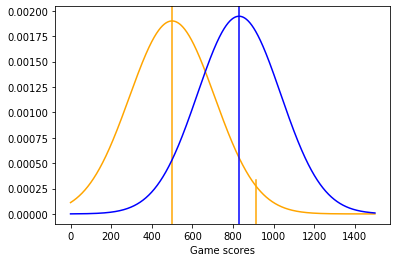

In [27]:
# Generate an x-vector of scores
score = np.arange(0, 1500, 1)

# Make up scores of control group
cont_m=500
cont_std=210

from scipy.stats import norm

# Plot the probability density function for control group
control = norm.pdf(score, loc = cont_m, scale = cont_std)  
plt.plot(score,control, c='orange') 
plt.axvline(cont_m, 0, 1, c='orange') #Mark the aveage

# Make up scores of experimental group
exper_m=830
exper_std=205

# Plot the probability density function for experimental group
exper = norm.pdf(score , loc = exper_m, scale = exper_std)
plt.plot(score, exper, c='blue') #Plot the experimental group
plt.axvline(exper_m, 0, 1, c='blue') #Mark the aveage

plt.xlabel('Game scores') 

#let us also mark the upper 5% in the control group
plt.axvline(cont_m+1.96*cont_std, 0, 0.2, c='orange')

plt.show()


As can be seen, the experimental group performs better overall. But still the overlap between the curves is such that the probability of obtaining the **blue mean value** from the **orange curve** is more than 0.05 (corresponding to 5%). 

### Try out 1:
Copy the code and redo the plot but reduce the standard deviation to half. What is the position of the mean value of the experimental group in relation to the critical value (the line calculated from significance level) now?


<a id= 'SystematicUnsystematic'> </a>

### 1.2 Systematic and Unsystematic Variance

In a well-controlled experiment, the systematic variance should *only* be due to the manipulation of the independent variable. Otherwise we will have difficulties in interpreting the results correctly (see an Chapter 4 on Validity and Reliability). But we will still have other variability, and this is our unsystematic. 

- Unsystematic variance in data is essentially random variability. It can be due to preferences, measurement errors etc. 

- Systematic variance, on the other hand, is something that causes a systematic difference in measurements between groups. 


We can return to the game scores above to illustrate these variances. If the null hypothesis was true ("There are no differences in game scores between experimental and control group"), we would consider all the collected data points to belong to *one* distribution rather than to two different populations with different means. When you manipulated the standard deviation in Try out 1, you saw the effect of reducing the unsystematic variance.  

### Try out 2:
Change the mean values for the two groups and redo the plots. Have you manipulated the systematic or unsystematic variance?


<a id= 'Stattest'> </a>

## 2. Statistical testing

We have already used z-scores and a single sample t-test. The rationale behind several statistical tests used to compare groups (experimental and control) is very similar: 

First we calculate a statistic suitable to the data that we have collected.  We then determine if it falls in the *critical region*. That is, if the difference between the values is so large that the statistic is unlikely to pop up by chance. That is, the *statistic* itself has a distribution, and it is now in that distribution we check what the probability is to randomly draw that value. 

Here is an example of chi-square ($\chi^2$) distribution that we will use a bit further down in this notebook: 

<a title="Geek3, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Chi-square_pdf.svg"><img width="512" alt="Chi-square pdf" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Chi-square_pdf.svg/512px-Chi-square_pdf.svg.png"></a>

You can look up the critical value, the cut-off point for the critical region, in a table. This value depend on the chosen significance level ("alpha", $\alpha$) and the *degrees of freedom* (df). Now, most test functions perform this look-up for you, and report the probability directly. Note, however, that when reporting statistical results, one is expected not only to report the probability and whether this is below the chosen criteria for significance, but also the actual test statistics and degrees of freedom (so that the reader can check that the results appear sound).


<a id= 'Errors'> </a>

### 2.1 Type I and II errors 

As we stated earlier, the chosen significance level ($\alpha$-level) is a criterion for what we are willing to accept as rejecting the null hypothesis on false grounds. This is one of two errors we can make in inferential statistics:

- Type I: Falsely stating that there is a statistically significant effect when, in truth, the result occured by chance.
- Type II: Falsely stating that there is NO statistically significant effect when there actually is an effect.

By chosing the 0.05 criteria, we accept that 5% of the time, we will reject the null hypothesis and be utterly wrong.
We can select a stricter significance level. If we use an $\alpha$-level of 0.01, we will only make a Type I error 1% of the time, but on the other hand the probability of making a Type II error (we call this $\beta$) is now increased.

Both these can be problematic and the context and consequences of the error must decide what criteria that makes sense to use. 



<a id= 'Effectsize'> </a>

### 2.2 Effect size
As we have touched upon earlier, the cut-off point of the statistical significance can be adjusted, and the actual critical value also depends on the size of the sample and its spread. In cases where we find that the experimental group has scores different from the control group, we also want to know the size of the effect. This helps us to interpret and make decisions based on the results. Is it really worth the cost of implementing the audio cues in the game? Does the effect warrant an investment in high quality headphones? 

The *effect size* gives us a measure of **how much of the variability in the data the effect accounts for**. Or simply put, how much of the total variability in data that the systematic variance can explain.

In the first plot with the game scores, it corresponds to the difference between experimental and control group means. There are different ways to calculate the actual effect size but for now we can think of it as a distance between the means of the two groups. 

<a id= 'Power'> </a>

### 2.3 Statistical power
The *power* of a test is the probability of detecting an effect (if it really exists). The probability of **not detecting a genuine effect** is $\beta$ and so the probability of actually detecting it is 1-$\beta$. 
Several resarchers think a reasonable rule of thumb is to detect the actual effect 80% of times ($1-\beta=0.8$).

The power will vary some with the actual statistical tests we use (e.g. parametric or non parametric). More imporantly, having made up our mind about the criteria to select for $\alpha$ and $\beta$, and with some idea about the effect size (either from pilot data or earlier literature), we can use this to calculate the sample size needed to actually detect the effect (if any). This is very useful, because it takes time and resources to collect and analyze data. If the effect is small (r=0.1) we would need to recruit 783 participants to detect it with $\alpha=0.05$ and $\beta=0.2$. It is therefore a good investment to estimate the effect size and go through a series of pilot tests to see if changing instructions, making special recruitment criteria or similar can reduce variability and increase effect size.

<a id= 'CategoricalResponses'> </a>

## 3. Comparing categorical response variables

What about when we have data in response categories, for instance completion rates? If we have larger samples where these can be viewed as proportions/percentages the data becomes more continous. But we can also perform comparions with discrete binary data by testing whether one condition is occurring more than the others. 

For instance, if users are testing two designs and asked to pick which one they prefer we can compare the number of times the design 'X'  was selected compared to the alternative 'Y'. We then compare this with what would have been expected *if the selection had been random*. That is, if participants had just randomly picked one of the designs without even bothering to try them out.

Let us take an example where participants have tried out one of two different designs (A or B) and we record their completion (pass, fail)

In [36]:
# The data for the different participants and their completion could look something like this: 
df = pd.DataFrame({'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                 'Design': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                            'B', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A'],
                   'Success': ['Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Fail',
                               'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass',
                               'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass']})
# Print out the first four participants
df.head(4)

,Participant,Design,Success
0,1,A,Pass
1,2,A,Fail
2,3,A,Fail
3,4,A,Pass


This can now be summarized in a contingency table with Designs in the rows, and completion success in columns.

In [37]:
# Create contingency table with Instrument as rows, and choice of Interface in columns

Tasktable = pd.crosstab(df.Design, [df.Success], margins = True)
# Margins = True adds the row and column sums

Tasktable

Success,Fail,Pass,All
Design,,,
A,3,6,9
B,5,6,11
All,8,12,20


Later on, we will refer to the cells in this table where the top row

 - a = number of Fails for Design A
 - b = number of Pass for Design A
 - c = number of Fails for Design B
 - d = number of Pass for Design B
 
 and
 - m = total for upper row (Design A)
 - n = total for lower row (Design B) 
 - r = total for Fails  (first column)
 - s = total for Pass  (second column) 

|Success |Fail |Pass |Total|
|-----|--------|-----|-----|
|A   |a      |b  |m  |
|B   |c      |d  |n  |
|Total   |r      |s  |N  |

<a id= 'Chi-Square'> </a>

### 3.1 Chi-Square Test

The chi-square test can be used for non numerical and non-normally distributed data where there are categories or different options. The chi-square statistic is calculated as the squared difference between *observed* frequency  $f_o$ and *expected* frequency $f_e$ , divided by the latter:

$$\chi^2= \sum{{(f_o - f_e)^2}\over{f_e}}$$

Let us say we have a selection test for two different designs, X and Y. After 144 trials  we imagine a contingency table where either X or Y was selected to look like this:

|Design X |Design Y|Total|
|-----|--------|-----|
|80   |64      |144  |


The expected frequency $f_e$, if people were randomly picking one of the two designs, would have been equally distributed:

|Design X |Design Y|Total|
|-----|--------|-----|
|72   |72      |144  |

### Try out 3:
Calculate $\chi^2$ for the example test between X and Y designs above.


In [ ]:
# The task is almost as easily done by hand, but here are some starting hints for using Python.

# fo_correct=
# fo_incorrect=
# fe_correct=
# fe_incorrect=

# Square the difference between observed and expected
# (fo_correct - fe_correct) ^ 2
# (fo_incorrect - fe_incorrect) ^ 2

#

Much like the we discussed we now want to determine whether the calculated statistic falls in the *critical region*. That is, if the difference between the expected and observed value is so large that it is unlikely to occur by chance. Similar to the t- tests, the cut-off point for the critical region depends on the significance level (alpha, $\alpha$) and the *degrees of freedom* (df). However, we calculate degrees of freedom a bit differently for contingency tables.

<a id= 'dof'> </a>

### 3.2 Degrees of Freedom for Contingency Tables

The degrees of freedom for a chi-square test relate to the number of choices or options in the contingency table: 

$$df=(R-1)(C-1)$$

Note that this is different from  many other statistics, for instance sample variance, where $df$ is related to the sample size.

For the special case of only one row, the first factor is not considered. For instance, in a test involving participants' selection of singers as being either male or female, there are two possible options to chose from. Just like the listening test example above, and is results in two categories (C) and   $df =$ $C-1=2-1=1$



### Try out 4: 
Calculate the degrees of freedom for the completion task (pass/fail) contingency table.

In [4]:
# Get the rows and columns from the table
# Tasktable.shape

(2, 3)

So with the $\chi^2$ and the degrees of freedom, we can look up the probability of achieving this statistic and its relation to the critical value. There are plenty of actual tables to do this, but, like most other statistical packages, Python has functions that does the looking-up-job for us.


In [39]:
# The scipy.stats function chi2_contingency give us the chisquare test from the observed contingency table
# based on the marginal sums (calculated totals) it calculates the expected frequencies 
# and returns the chi-square statistic, probability, as well as degrees of freedom
stat, p, dof, expected = stats.chi2_contingency(Interfacetable)

print('Chi-square Statistic=%.3f, p=%.3f' % (stat, p))

Chi-square Statistic=2.107, p=0.910


### Try out 5: 
Print the degrees of freedom output from the chi2_contingency function and compare to what you calculated in Try out 4.

In [ ]:
# print('Degrees of freedom=%i '  % (dof))

<a id= 'ChiN-1'> </a>

### 3.3 N-1 Chi-square test

When expeted cell counts are small (some mean "small" means lower than 5), it is not too accurate. As long as we have cell counts larger than 1, a corrected version performs just as well or better:

$$\chi^2= \frac{(ad - bc)^2(N-1)}{mnrs}$$

### Try out 6: 
Calculate this corrected Chi-square for the Tasktable and compare to the one by the chi2_contingency function.